In [24]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

# Загрузка данных из файла
file_path = "losses/gaussian/fashion_mnist_additive_test_losses.pkl"
with open(file_path, "rb") as f:
    data = pickle.load(f)

# Преобразование данных в список чисел
numbers = [float(item) for item in data]

# Опционально, вывод списка чисел для проверки
print(numbers)


[4721.039340634889, 4384.043877323971, 4094.9983682753164, 3889.6043809335442, 3775.909847211234, 3710.2919241989716, 3676.6671961530856, 3660.2775724386865, 3642.069994190071, 3626.6352013696596, 3619.6575016070014, 3617.2880272201346, 3615.5207550435125, 3610.753436511076, 3612.6076691060125, 3609.94560299644, 3604.8868856309336, 3608.7191950158226, 3607.3301399327534, 3608.2920169106014, 3609.6594114665745, 3608.528657164755, 3609.9508875593356, 3617.5648641465586, 3606.5940435868274, 3603.9416256675236, 3607.4899747824365, 3606.2647875049447, 3607.8859925089005, 3607.6066585492486, 3626.9007614715188, 3613.3470814378957, 3606.3525637856014, 3606.0000587173654, 3611.236535180973, 3613.7503584849683, 3614.5842779618274, 3619.83251953125, 3618.5324367088606, 3617.7847854034812, 3620.4261551869067, 3614.6926485858385, 3619.7968533672865, 3631.9452228787577, 3624.834546825554, 3638.609637682951, 3636.1095295193827, 3626.97265625, 3619.964074243473, 3627.1911590189875]


In [25]:
datasets = ['fashion_mnist', 'mnist']
distributions = ['logistic', 'gaussian']
coupling_types = ['additive', 'affine']

for dataset in datasets:
    print(f"Dataset: {dataset}")
    for distribution in distributions:
        for coupling_type in coupling_types:
            folder_path = f"losses/{distribution}/"
            file_name = f"{dataset}_{coupling_type}_test_losses.pkl"
            file_path = os.path.join(folder_path, file_name)

            with open(file_path, "rb") as f:
                test_losses = pickle.load(f)
            
            file_name = f"{dataset}_{coupling_type}_train_losses.pkl"
            file_path = os.path.join(folder_path, file_name)

            with open(file_path, "rb") as f:
                train_losses = pickle.load(f)

            print(f"Distribution: {distribution}, Coupling Type: {coupling_type}")
            print(f"Test Losses: {test_losses}")
            print(f"Train Losses: {train_losses}\n")


Dataset: fashion_mnist
Distribution: logistic, Coupling Type: additive
Test Losses: [5075.5954682555375, 4722.740376532833, 4392.026707130142, 4100.903938390032, 3868.33125247231, 3708.39218255538, 3606.244647448576, 3541.5964479084255, 3498.118689428402, 3466.4125203965586, 3444.239576122429, 3424.6145081339005, 3414.7607730913764, 3403.119103540348, 3391.7669847705697, 3388.3926955597312, 3387.0965900662577, 3383.4576740506327, 3376.5156466327135, 3377.6131730864317, 3373.1792424841774, 3375.0555960739716, 3369.9506495994856, 3371.2566597854034, 3367.2650192840188, 3368.941931615902, 3365.1886774376976, 3367.0853595975077, 3364.5079762905457, 3367.0414173753957, 3368.159516539755, 3366.4081629499606, 3363.4128757911394, 3363.2718150464793, 3365.7597687153875, 3366.2134994313687, 3365.0591871044303, 3362.921405261076, 3361.1295984968356, 3363.8360765674447, 3363.334030730815, 3361.7316307357596, 3367.9326975375793, 3364.8339627422865, 3361.692138671875, 3365.5510593848894, 3364.739566

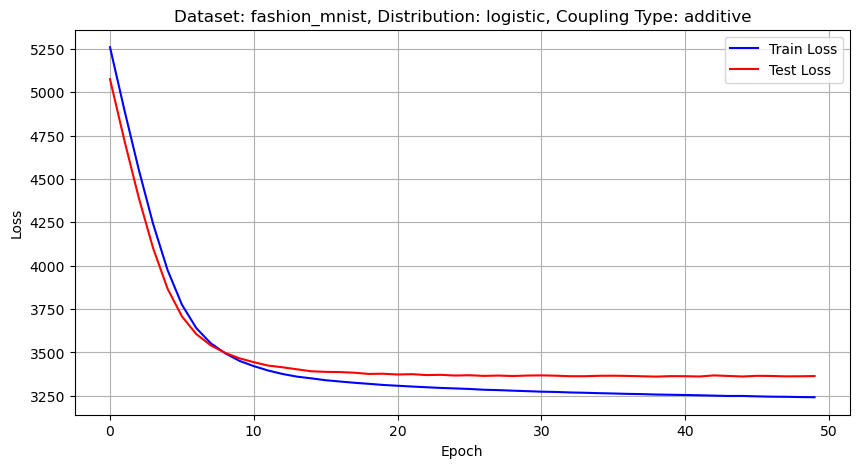

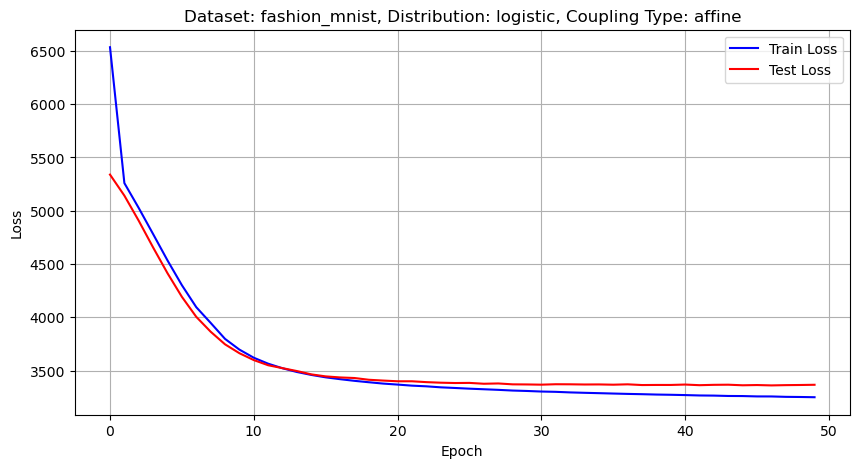

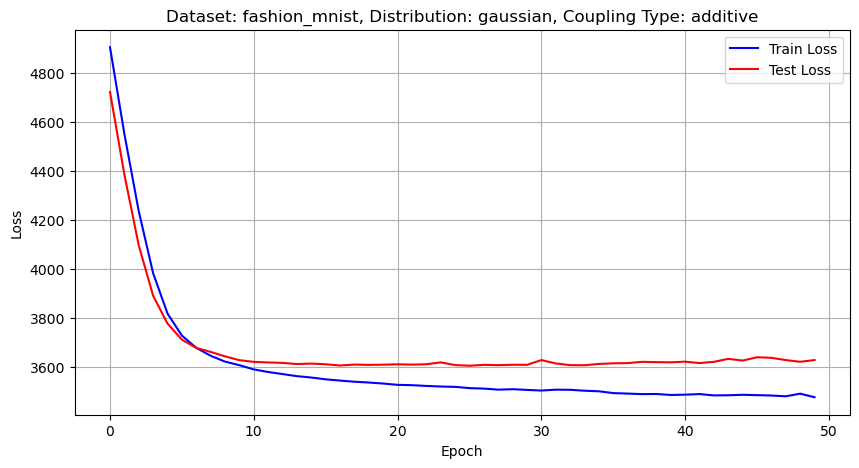

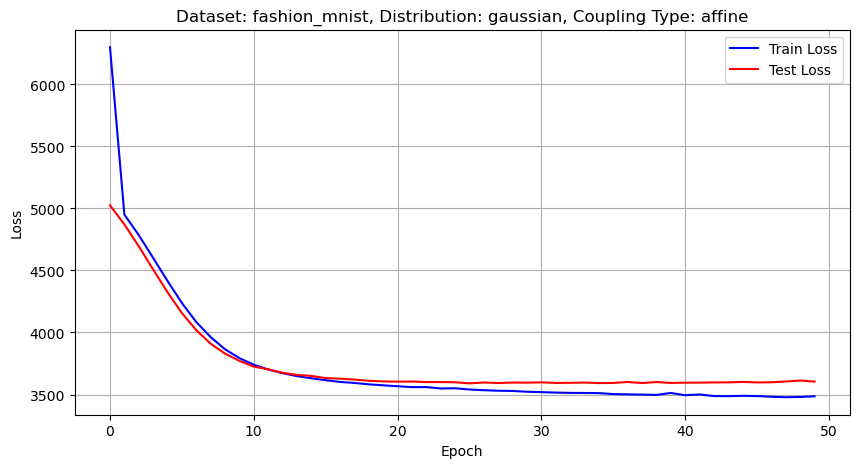

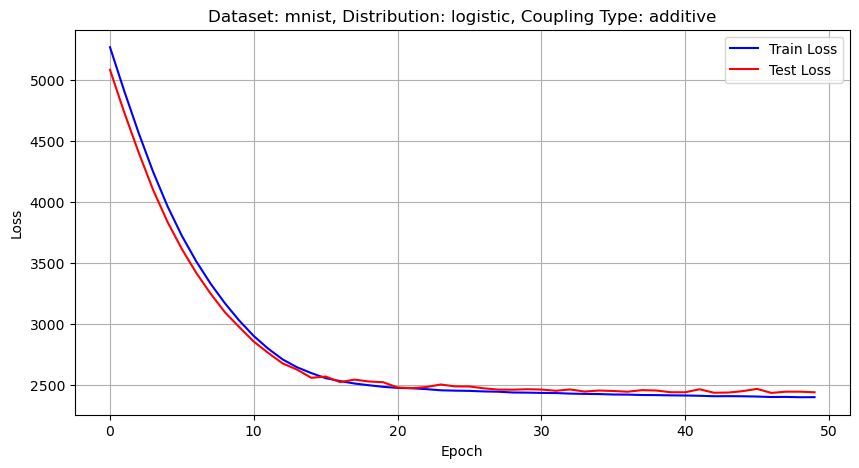

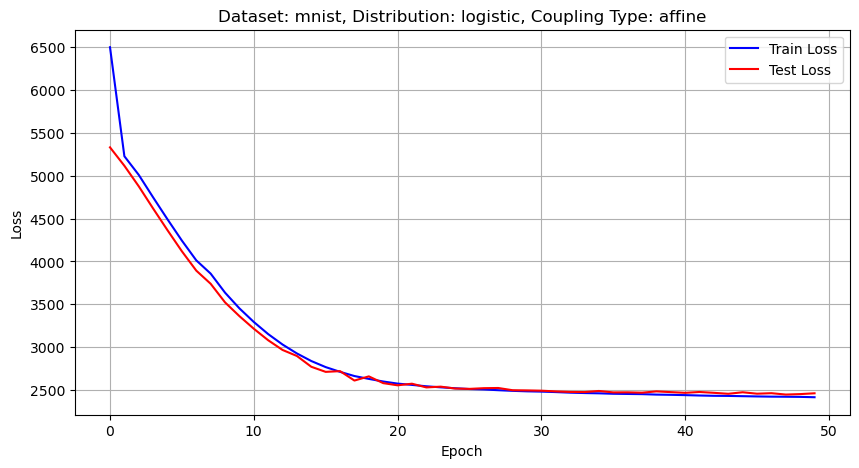

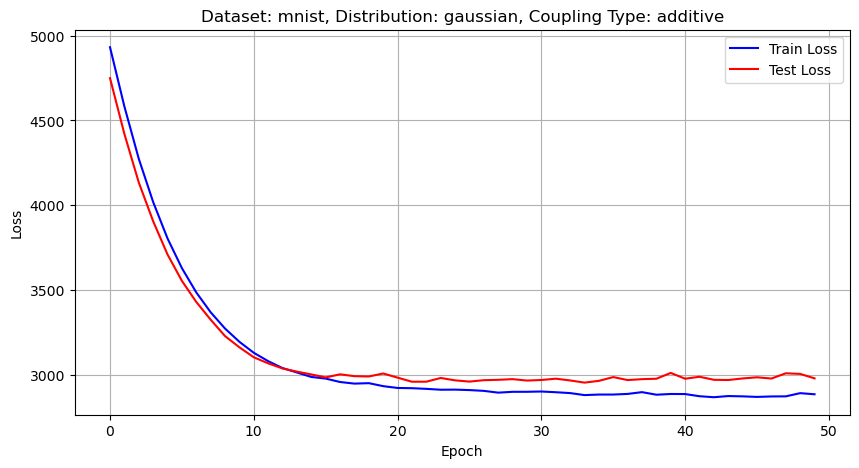

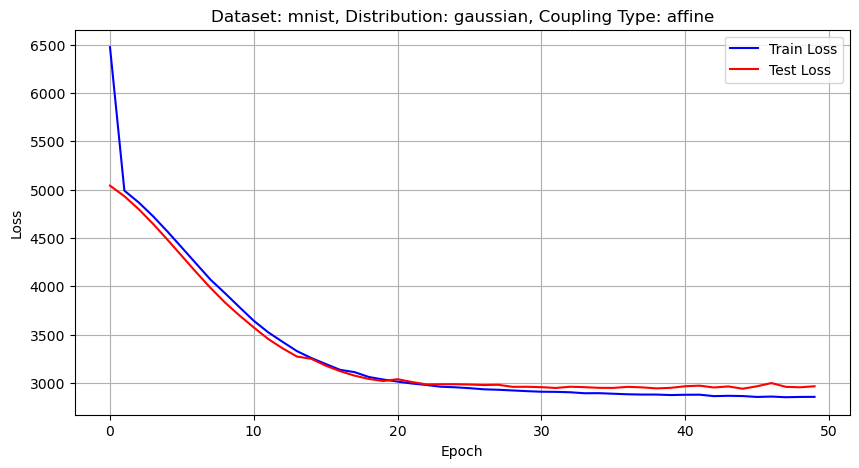

In [33]:
for dataset in datasets:
    for distribution in distributions:
        for coupling_type in coupling_types:
            folder_path = f"losses/{distribution}/"
            train_file_name = f"{dataset}_{coupling_type}_train_losses.pkl"
            test_file_name = f"{dataset}_{coupling_type}_test_losses.pkl"
            train_file_path = os.path.join(folder_path, train_file_name)
            test_file_path = os.path.join(folder_path, test_file_name)

            with open(train_file_path, "rb") as f:
                train_losses = pickle.load(f)
                train_losses = [float(item) for item in train_losses]
                
            with open(test_file_path, "rb") as f:
                test_losses = pickle.load(f)
                test_losses = [float(item) for item in test_losses]
            
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Train Loss', color='blue')
            plt.plot(test_losses, label='Test Loss', color='red')
            plt.title(f'Dataset: {dataset}, Distribution: {distribution}, Coupling Type: {coupling_type}')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()


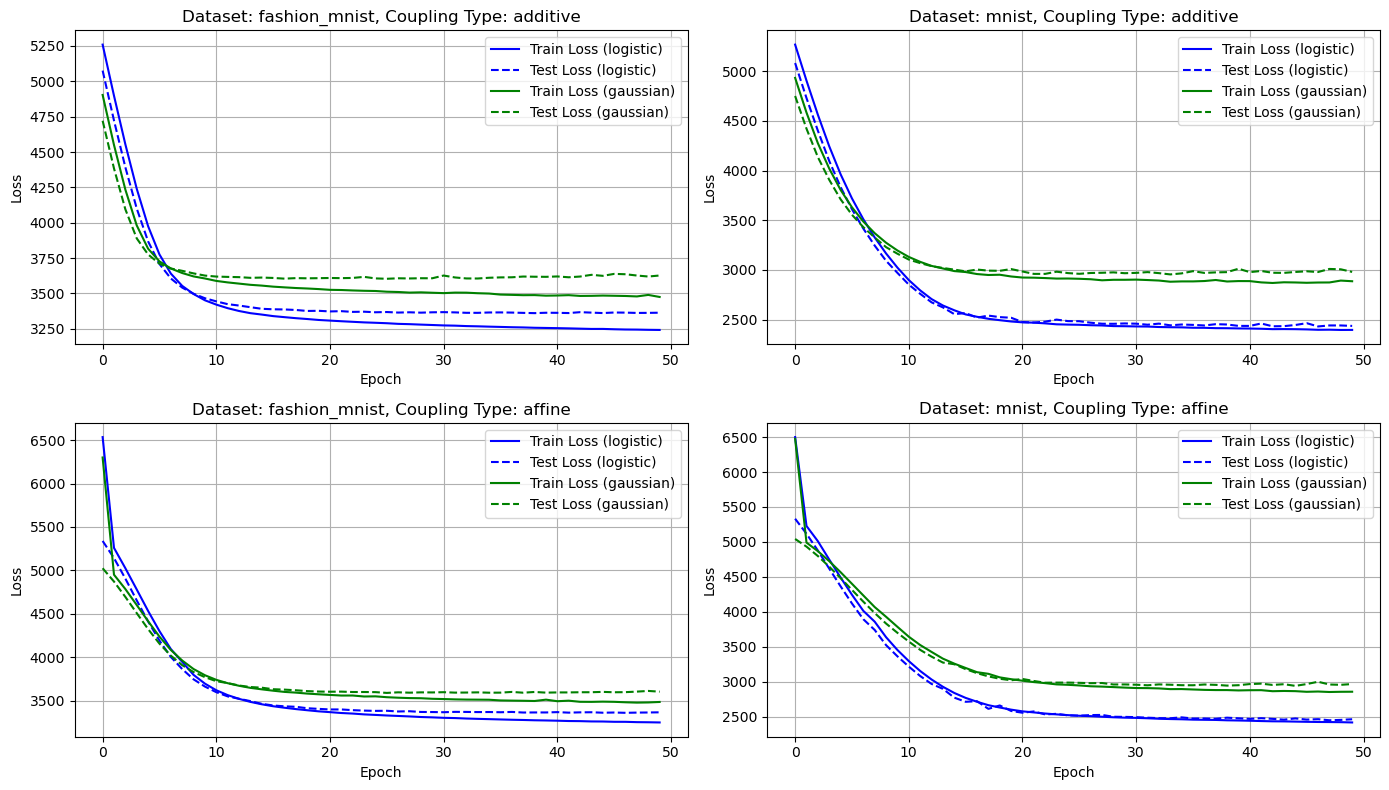

In [41]:
colors = {'logistic': 'blue', 'gaussian': 'green'}
linestyles = {'train': '-', 'test': '--'}

fig, axs = plt.subplots(len(coupling_types), len(datasets), figsize=(14, 8))

for i, coupling_type in enumerate(coupling_types):
    for j, dataset in enumerate(datasets):
        for distribution in distributions:
            folder_path = f"losses/{distribution}/"
            train_file_name = f"{dataset}_{coupling_type}_train_losses.pkl"
            test_file_name = f"{dataset}_{coupling_type}_test_losses.pkl"
            train_file_path = os.path.join(folder_path, train_file_name)
            test_file_path = os.path.join(folder_path, test_file_name)

            with open(train_file_path, "rb") as f:
                train_losses = pickle.load(f)
                train_losses = [float(item) for item in train_losses]
                
            with open(test_file_path, "rb") as f:
                test_losses = pickle.load(f)
                test_losses = [float(item) for item in test_losses]
            
            ax = axs[i, j]
            ax.plot(train_losses, label=f'Train Loss ({distribution})', color=colors[distribution], linestyle=linestyles['train'])
            ax.plot(test_losses, label=f'Test Loss ({distribution})', color=colors[distribution], linestyle=linestyles['test'])
            ax.set_title(f'Dataset: {dataset}, Coupling Type: {coupling_type}')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.legend()
            ax.grid(True)

plt.tight_layout()
plt.show()


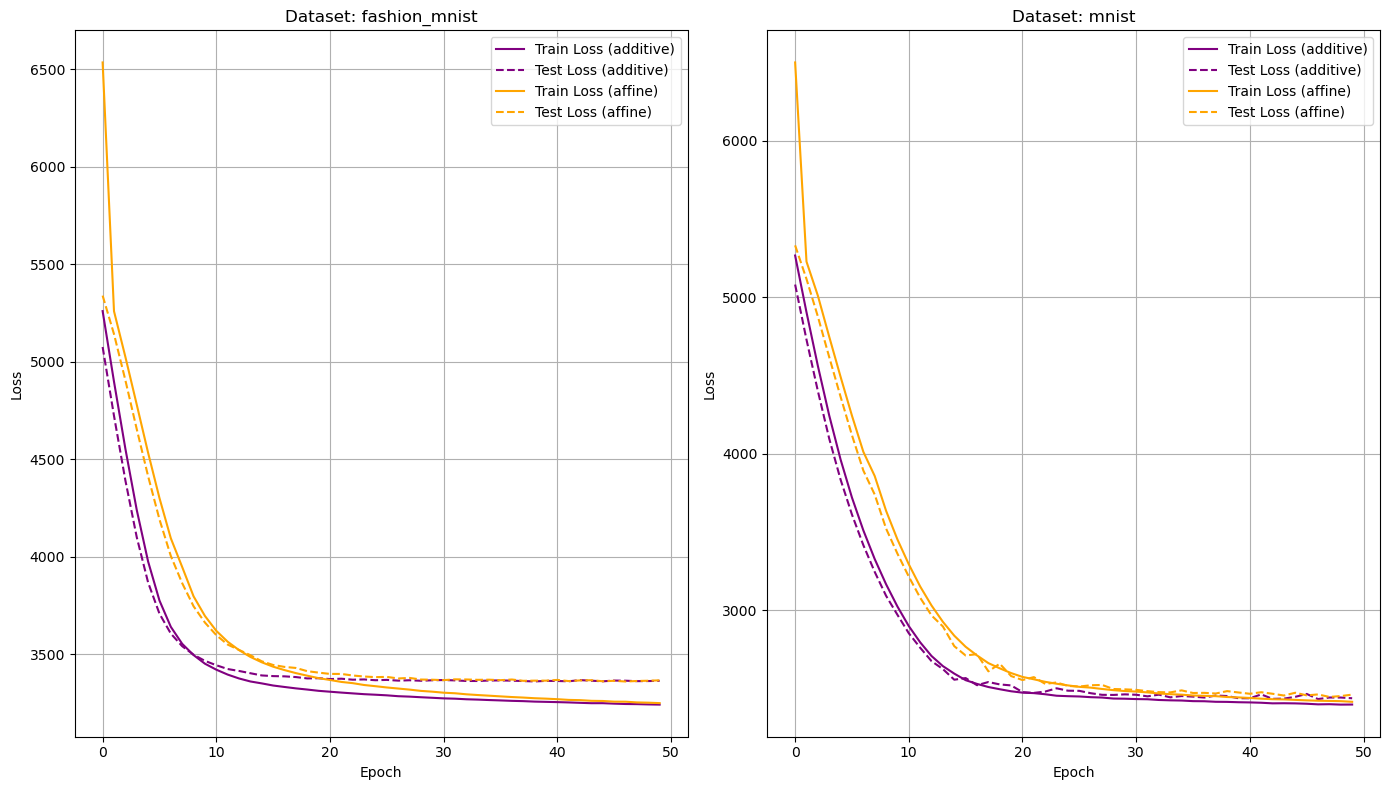

In [70]:
import pickle
import os
import matplotlib.pyplot as plt

datasets = ['fashion_mnist', 'mnist']
coupling_types = ['additive', 'affine']
colors = {'additive': 'purple', 'affine': 'orange'}
linestyles = {'train': '-', 'test': '--'}

fig, axs = plt.subplots(1, 2, figsize=(14, 8))  # Изменено на 1 строку и 2 столбца

for j, dataset in enumerate(datasets):
    for i, coupling_type in enumerate(coupling_types):  # Поменяли местами циклы, чтобы перебирать сначала dataset, затем coupling_type
        folder_path = "losses/logistic/"
        train_file_name = f"{dataset}_{coupling_type}_train_losses.pkl"
        test_file_name = f"{dataset}_{coupling_type}_test_losses.pkl"
        train_file_path = os.path.join(folder_path, train_file_name)
        test_file_path = os.path.join(folder_path, test_file_name)

        with open(train_file_path, "rb") as f:
            train_losses = pickle.load(f)
            train_losses = [float(item) for item in train_losses]

        with open(test_file_path, "rb") as f:
            test_losses = pickle.load(f)
            test_losses = [float(item) for item in test_losses]

        ax = axs[j]  # Используем axs[j], так как у нас только одна строка и j идет по наборам данных
        ax.plot(train_losses, label=f'Train Loss ({coupling_type})', color=colors[coupling_type], linestyle=linestyles['train'])
        ax.plot(test_losses, label=f'Test Loss ({coupling_type})', color=colors[coupling_type], linestyle=linestyles['test'])
        ax.set_title(f'Dataset: {dataset}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()


In [59]:
def create_tables(dataset):
    results_train = []
    results_test = []

    for distribution in distributions:
        for coupling_type in coupling_types:
            folder_path = f"losses/{distribution}/"
            train_file_name = f"{dataset}_{coupling_type}_train_losses.pkl"
            test_file_name = f"{dataset}_{coupling_type}_test_losses.pkl"
            train_file_path = os.path.join(folder_path, train_file_name)
            test_file_path = os.path.join(folder_path, test_file_name)

            with open(train_file_path, "rb") as f:
                train_losses = pickle.load(f)
                train_losses = [float(item) for item in train_losses]
                train_loss_last = train_losses[-1]

            with open(test_file_path, "rb") as f:
                test_losses = pickle.load(f)
                test_losses = [float(item) for item in test_losses]
                test_loss_last = test_losses[-1]

            results_train.append({
                'Distribution': distribution,
                'Coupling Type': coupling_type,
                'Train Loss': train_loss_last
            })

            results_test.append({
                'Distribution': distribution,
                'Coupling Type': coupling_type,
                'Test Loss': test_loss_last
            })

    df_train = pd.DataFrame(results_train)

    df_test = pd.DataFrame(results_test)

    return df_train, df_test



In [60]:
dataset = 'fashion_mnist'
df_train_fashion, df_test_fashion = create_tables(dataset)

print(f"Dataset: {dataset.capitalize()}\n")

print("Train Losses:")
print(tabulate(df_train_fashion.sort_values(by='Train Loss'), headers='keys', tablefmt='pretty', showindex=False))

print("\nTest Losses:")
print(tabulate(df_test_fashion.sort_values(by='Test Loss'), headers='keys', tablefmt='pretty', showindex=False))



Dataset: Fashion_mnist

Train Losses:
+--------------+---------------+-------------------+
| Distribution | Coupling Type |    Train Loss     |
+--------------+---------------+-------------------+
|   logistic   |   additive    | 3242.232177734375 |
|   logistic   |    affine     |   3249.91796875   |
|   gaussian   |   additive    | 3475.41064453125  |
|   gaussian   |    affine     |   3485.73046875   |
+--------------+---------------+-------------------+

Test Losses:
+--------------+---------------+--------------------+
| Distribution | Coupling Type |     Test Loss      |
+--------------+---------------+--------------------+
|   logistic   |   additive    | 3364.1411441851264 |
|   logistic   |    affine     | 3366.6857508405856 |
|   gaussian   |    affine     | 3604.2903511916534 |
|   gaussian   |   additive    | 3627.1911590189875 |
+--------------+---------------+--------------------+


In [57]:
# Вывод красивых таблиц для другого датасета
dataset = 'mnist'
df_train_mnist, df_test_mnist = create_tables(dataset)

print(f"\nDataset: {dataset.capitalize()}\n")

print("Train Losses:")
print(tabulate(df_train_mnist.sort_values(by='Train Loss'), headers='keys', tablefmt='pretty', showindex=False))

print("\nTest Losses:")
print(tabulate(df_test_mnist.sort_values(by='Test Loss'), headers='keys', tablefmt='pretty', showindex=False))



Dataset: Mnist

Train Losses:
+--------------+---------------+-------------------+
| Distribution | Coupling Type |    Train Loss     |
+--------------+---------------+-------------------+
|   logistic   |   additive    | 2397.377685546875 |
|   logistic   |    affine     | 2414.901611328125 |
|   gaussian   |    affine     |  2854.7353515625  |
|   gaussian   |   additive    | 2886.744873046875 |
+--------------+---------------+-------------------+

Test Losses:
+--------------+---------------+--------------------+
| Distribution | Coupling Type |     Test Loss      |
+--------------+---------------+--------------------+
|   logistic   |   additive    | 2437.5713385087024 |
|   logistic   |    affine     | 2460.7573303995255 |
|   gaussian   |    affine     | 2964.502113825158  |
|   gaussian   |   additive    | 2980.4432604825947 |
+--------------+---------------+--------------------+
